This is a quick tutorial on how to create your own city map background for BlueSky. This tutorial presents a simple method for replacing the existing tiled maps in BlueSky, that use OpenTopoMap.
The requirements are:

1. A BlueSky installation
2. A QGIS installation (free to download via https://qgis.org/en/site/)

The tuturoal steps are as follows:
1. Open the QGIS software and (important!) change reference frame to WGS 4326.
This is found in the bottom right corner of the interface.

2. On the left side of the interface (in the Browser) click XYZ Tiles -> OpenStreetMap
An instance of the map tiles should now be open. Now is your opportunity to make edits: make the map dark or add data points for visualisation should that be needed!
For our example, we add some random geometry on top, as a test of the approach working.

3. In the top ribbon, click on processing -> Raster Tools -> Generate XYZ tiles (Directory)

The sub-tab where the option is found can also be found using the search bar.
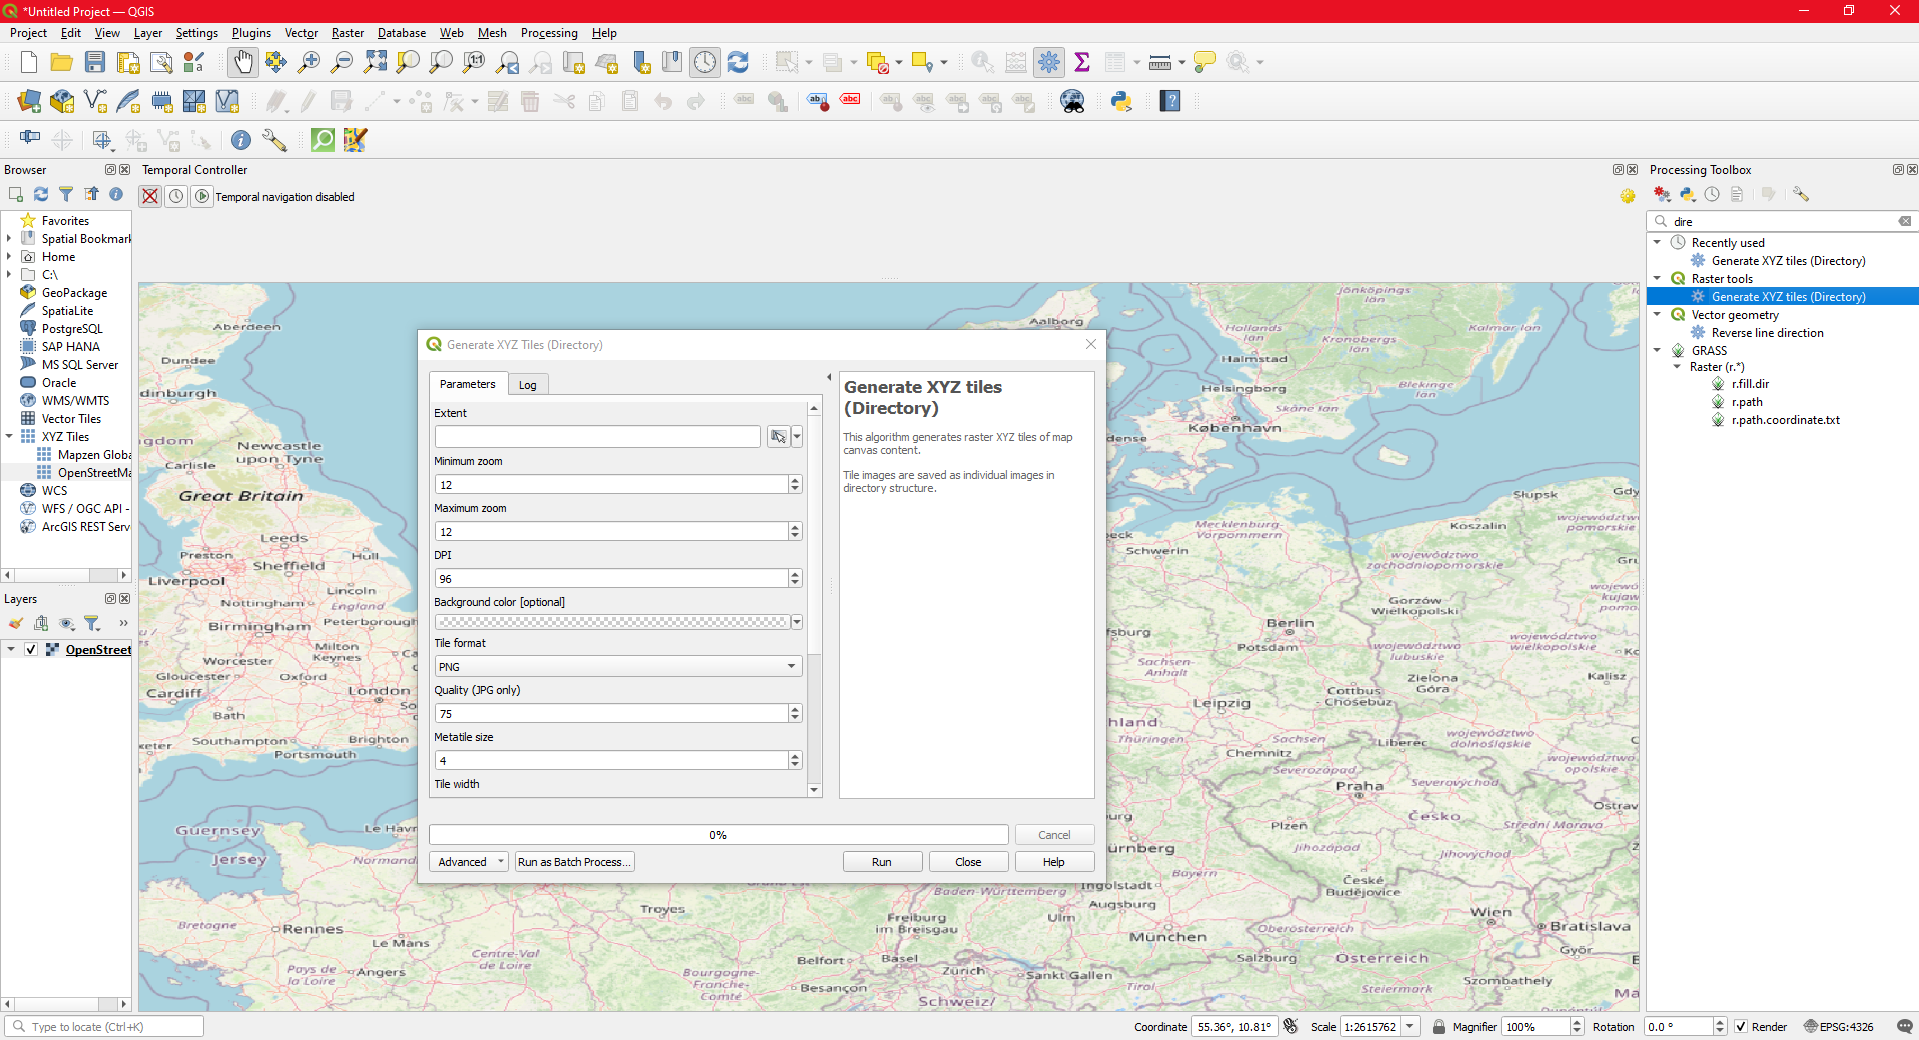

After this is done, use the mouse icon just to the right of the Extent field to set the bounding box (or provide own values):

4. Set the parameters
The zoom level of 0 minimum and 15 maximum is used in the example.
You can use a higher maximum setting for more resolution, but then the download will take a significant amount of time.

5. Choose save directory, so just make a folder and name it (in this example, we use QGIS2, but any name can be given here)
This now needs to be copied, so just Control+C the folder

6. Dump folder in bluesky-master -> cache
This then replaces the core cache files, and your custom map is almost ready to be used.


In the final step, the tile sources need to be edited in BlueSky itself. Navigate to bluesky-master -> settings.cfg and add the following code at the end of the file:


In [ ]:
tilesource = 'QGIS2'
tile_sources={
        'opentopomap': {
            'source': ['https://a.tile.opentopomap.org/{zoom}/{x}/{y}.png',
                       'https://b.tile.opentopomap.org/{zoom}/{x}/{y}.png',
                       'https://c.tile.opentopomap.org/{zoom}/{x}/{y}.png'],
            'max_download_workers': 2,
            'max_tile_zoom': 17,
            'license': 'map data: © OpenStreetMap contributors, SRTM | map style: © OpenTopoMap.org (CC-BY-SA)'},
        'cartodb': {
            'source': ['https://cartodb-basemaps-b.global.ssl.fastly.net/{zoom}/{x}/{y}.png'],
            'max_tile_zoom': 20,
            'license': 'CartoDB'
        },
        'darkcarto': {
            'source': ['https://cartodb-basemaps-a.global.ssl.fastly.net/dark_all/{z}/{x}/{y}.png'],
            'max_tile_zoom': 29,
            'license': 'CartoDB'
        },
        'nasa': {
            'source': ['https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{zoom}/{y}/{x}.jpg'],
            'max_tile_zoom': 13,
            'license': 'Satellite images from NASA via ESRI'
        },
        'maptiler': {
            'source': ['https://api.maptiler.com/maps/streets/{zoom}/{x}/{y}.png?key=rM62o69FDeWKmRLruVCZ'],
            'max_download_workers': 20,
            'max_tile_zoom': 20,
            'license': '© MapTiler © OpenStreetMap contributors'
        },
        'dark_mapbox': {
            'source': ['http://localhost:8080/styles/dark_mapbox/{zoom}/{x}/{y}@2x.png'],
            'max_tile_zoom': 20,
            'license': '© Mapbox © OpenStreetMap contributors'
        },
        'QGIS2': {
            'source': ['https://a.tile.opentopomap.org/{zoom}/{x}/{y}.png',
                       'https://b.tile.opentopomap.org/{zoom}/{x}/{y}.png',
                       'https://c.tile.opentopomap.org/{zoom}/{x}/{y}.png'],
            

        }
}

Congratulations! You can now import your own OSM maps! (Such as this one with some polygons that were randomly drawn on).

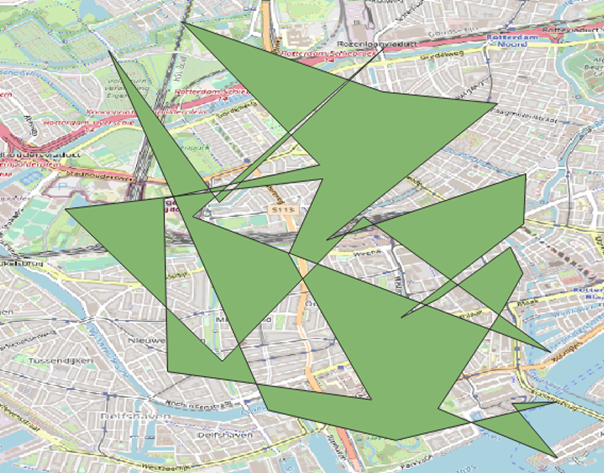

The 'source' is left as opentopomap in case cache is empty, but should be unused.
Pay specific attention to the tilesource parameter: that should be the same as the name of the source, in our case QGIS2. 


Other considerations are, and some points to imporve upon:
- The package momepy.roundabout_simplification can help simplify street layout by removing roundabouts
- Parallel street removal is tricky: the problem is that the number of streets could be reduced for UTM applications. This is up to the user however.